# FOOD AND NUTRITION PROJECT 
### Goals: Which Cuisine/Course/Diet has more cooking Time?
### Which has lowest cooking/prep time?
### Filter Datas based on User needs

### <font color=Green> Importing libraries </font>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


#### <font color=Green> Loading the data </font>

In [2]:
df = pd. read_csv("Recipe.csv")
data = df.copy()
data.shape


(6871, 15)

### <font color=blue> We have 6871 rows and 15 columns </font>

### Dropping Unwanted Columns and Renaming the Columns
* we have columns in hindi lets remove it and keep all the values in English

In [6]:
data.drop(["Ingredients"], axis = 1, inplace = True) 
data.shape #After dropping there are 6871,14 datas.
#dropping unwanted columns to avoid redundancy
data.drop(["RecipeName"],axis = 1 , inplace= True)
data.drop(["Instructions"], axis =1 , inplace = True)
data.shape

(6871, 12)

### <font color=blue>After removing the columns we have 6871 rows and 12 columns lets rename the columns now </font>

In [9]:
data.rename(columns={'TranslatedRecipeName':'Recipe Name','TranslatedIngredients':'Ingredients', 'TranslatedInstructions':'Instructions','Srno':'Recipe No', 'PrepTimeInMins':'Preparation Time/Min','CookTimeInMins':'Cooking Time/Min','TotalTimeInMins':'Total Time/Min','URL':'Link'},inplace=True)
data.columns

Index(['Recipe No', 'Recipe Name', 'Ingredients', 'Preparation Time/Min',
       'Cooking Time/Min', 'Total Time/Min', 'Servings', 'Cuisine', 'Course',
       'Diet', 'Instructions', 'Link'],
      dtype='object')

### <font color=Green> Describe Method on numbers and Objects </font>
*  It is used to view some basic statistical details like percentile, mean, std etc.

In [14]:
data.describe(include=[np.number])
#We have 4 columns (excluding recipe no) of number data type

,Recipe No,Preparation Time/Min,Cooking Time/Min,Total Time/Min,Servings
count,6871.000000,6871.000000,6871.000000,6871.000000,6871.000000
mean,4902.979042,28.585213,30.832339,59.417552,5.611410
std,3479.531022,81.042007,34.019694,88.699940,26.221807
min,1.000000,0.000000,0.000000,0.000000,1.000000
25%,1955.500000,10.000000,20.000000,30.000000,4.000000
50%,4304.000000,15.000000,30.000000,40.000000,4.000000
75%,7363.000000,20.000000,35.000000,55.000000,4.000000
max,14211.000000,2880.000000,900.000000,2925.000000,1000.000000


In [15]:
data.describe(include=[np.object])
#we have 7 columns of object type

,Recipe Name,Ingredients,Cuisine,Course,Diet,Instructions,Link
count,6871,6865,6871,6871,6871,6871,6871
unique,6843,6857,82,20,10,6870,6871
top,Carrot and Beans Poriyal (Recipe In Hindi),"500 grams Button mushrooms - chopped,2 Green C...",Indian,Lunch,Vegetarian,To prepare Four Cheese and Spinach Stuffed Mus...,http://www.archanaskitchen.com/mangalorean-kun...
freq,2,2,1157,1765,4712,2,1


## <font color=red> What does the describe method tells us?</font>
1. Top Cuisine : Indian <br>
2. Top Course : Lunch <br>
3. Top Diet : Vegetarian <br>
4. (Mean) Servings :5 <br>
5. (Mean) Preparation Time: 28 <br>
6. (Mean) Cooking Time : 30 <br>
7. (Mean) Total Time : 59 <br>


#### <font color=Green> Setting Index to Recipe No </font>

In [17]:
data.set_index("Recipe No", inplace= True)

In [19]:
data.head(2)
data.shape

(6871, 11)

### <font color=Green> Checking for null value </font>

In [20]:
print(data.isnull().sum())

Recipe Name             0
Ingredients             6
Preparation Time/Min    0
Cooking Time/Min        0
Total Time/Min          0
Servings                0
Cuisine                 0
Course                  0
Diet                    0
Instructions            0
Link                    0
dtype: int64


####  <font color=blue> I see Ingredients Column has 6 missing value. Is the missing values are MCAR, MAR or MNAR?Dropping is most useful when the percentage of missing data is low.</font>

In [30]:
data.dropna(subset=["Ingredients"], axis=0, inplace=True)
print("Checking after deleting the rows which has null columns:" , data.isnull().sum())
print("After cleaning the number of rows and columns: ",data.shape)

Checking after deleting the rows which has null columns: Recipe Name             0
Ingredients             0
Preparation Time/Min    0
Cooking Time/Min        0
Total Time/Min          0
Servings                0
Cuisine                 0
Course                  0
Diet                    0
Instructions            0
Link                    0
dtype: int64
After cleaning the number of rows and columns:  (6865, 11)


# <font color=Green> Let's Visualise the Top list of Course,Cuisine and Diet through Visualisation </font>

# CountPlot to Top Course in Data
* Show value counts for a single categorical variable:
* <font color=red>The Categorical Variables are : Course, Diet and Cuisine. </font>
* <font color=red>The Numerical Variable are: Prep Time, CookingTime, Total Time and Servings </font>

Text(0.5, 1.0, 'Types of Diet')

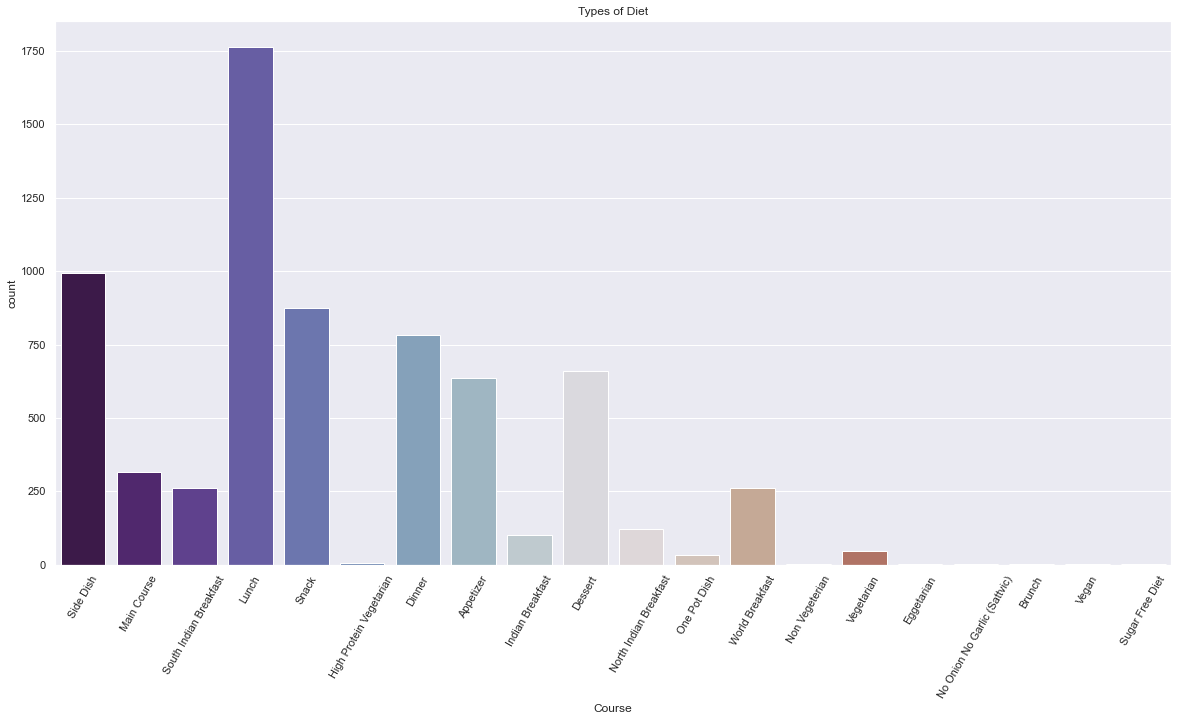

In [51]:
sns.set(rc={'figure.figsize':(20,10)})
sns.countplot(x='Course',data=data,palette='twilight_shifted')
plt.xticks(rotation=60)
plt.title('Types of Diet')

#####  <font color=red>The order has follows (from high to low) Lunch, Side Dish , Snack, Dinner,Dessert,Appetizer, Maincourse ..the list goes off </font>

# Plot Bar on Cuisine Column

Text(0, 0.5, 'Cooking Time/Min')

C:\Users\kgvij\Lavanya\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 65279 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\kgvij\Lavanya\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 65279 missing from current font.
  font.set_text(s, 0, flags=flags)


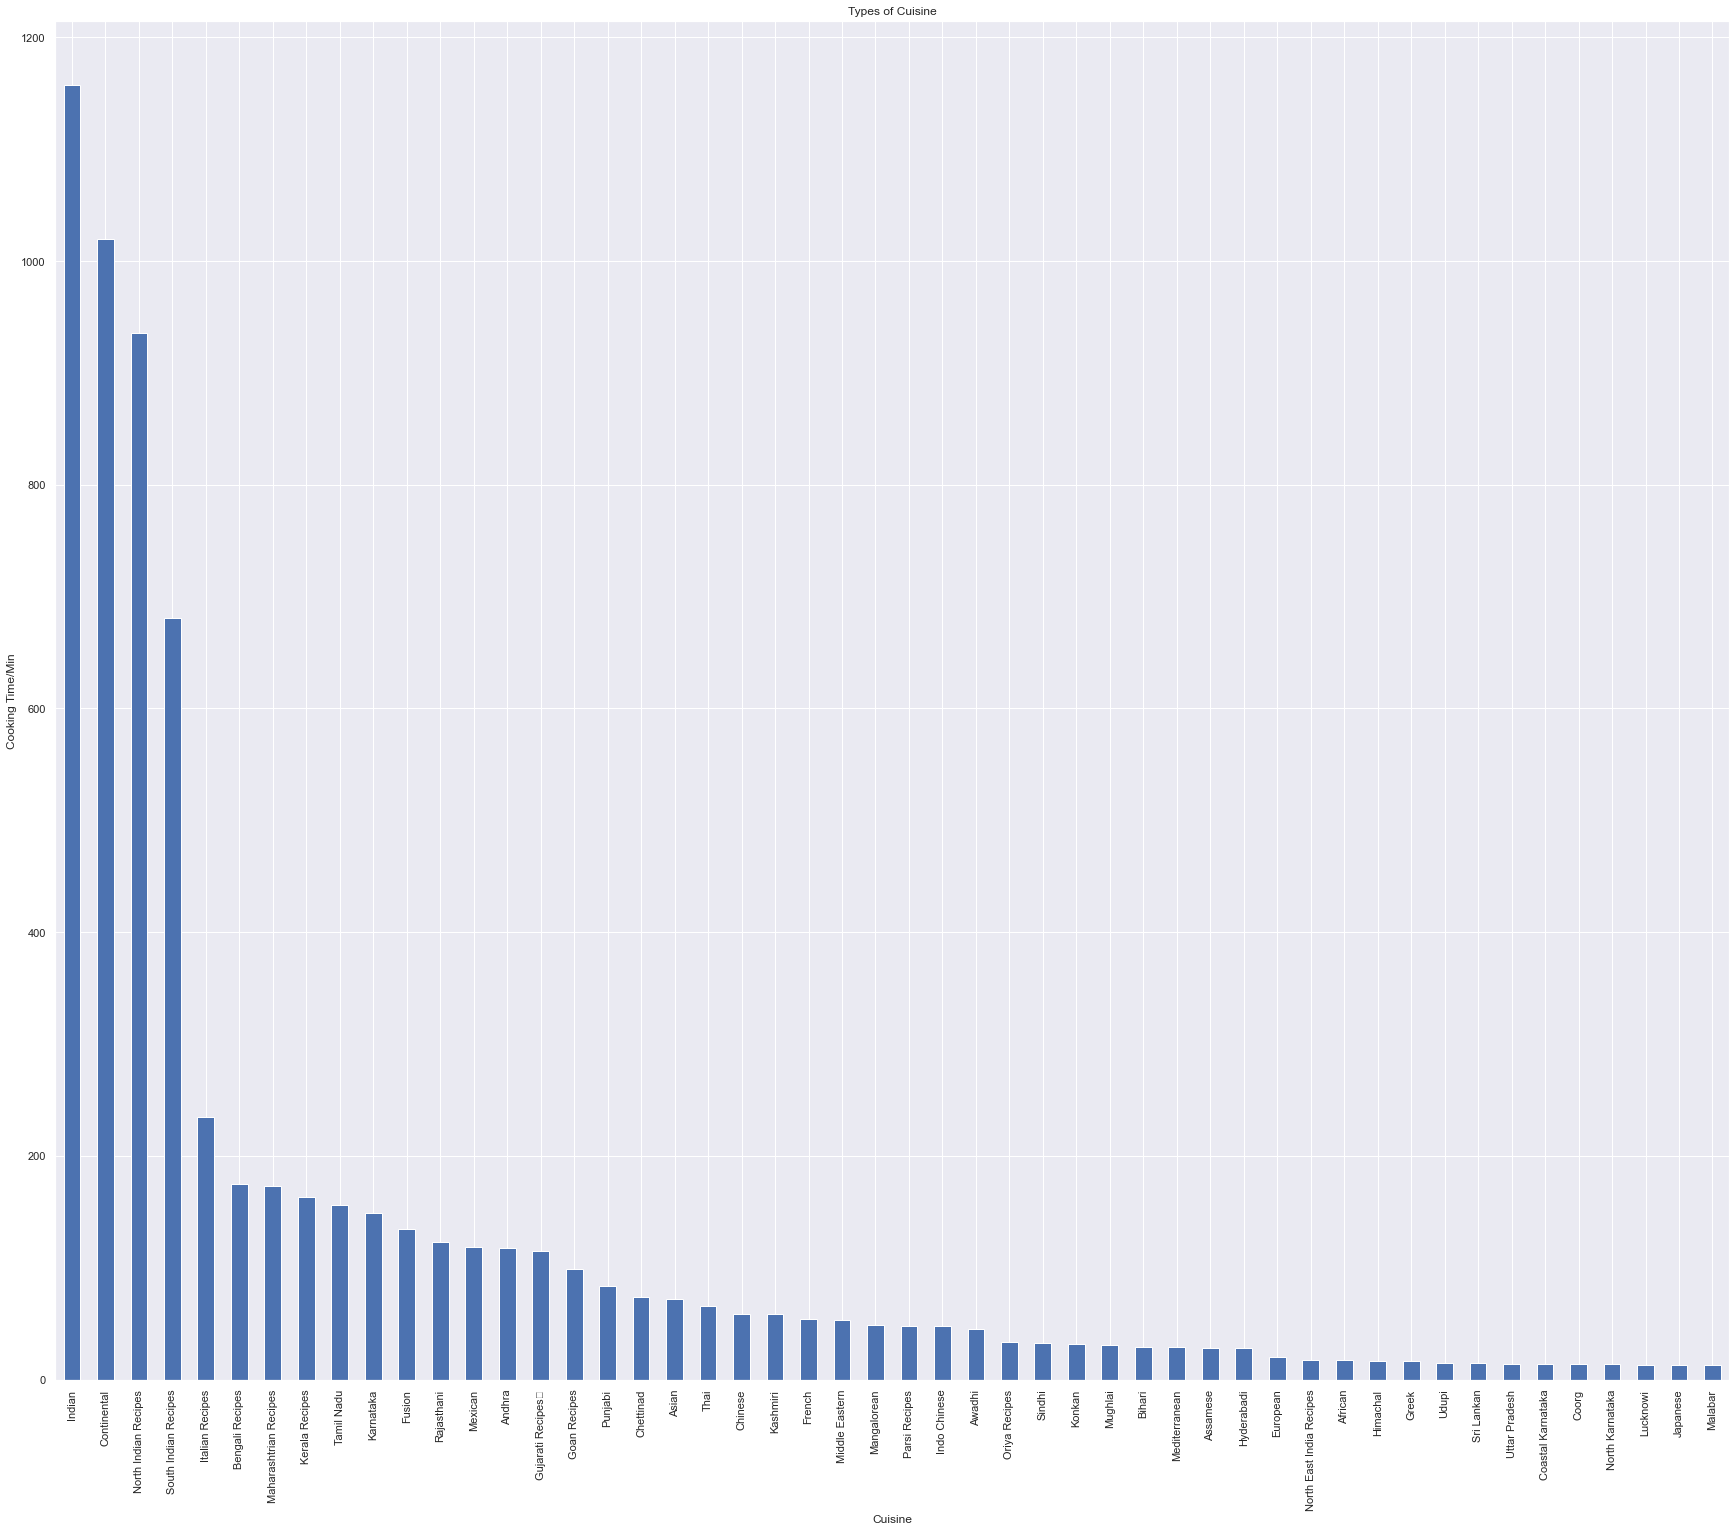

In [49]:
data.Cuisine.value_counts().nlargest(50).plot(kind="bar",figsize=(30,25))
plt.title("Types of Cuisine")
plt.xlabel("Cuisine")
plt.ylabel("Cooking Time/Min")

##### <font color=red> Indian ,Continental ,North Indian ,South Indian, Italian ,Bengali ...The list goes on </font>

# CountPlot on Diet

Text(0.5, 1.0, 'Types of Diets')

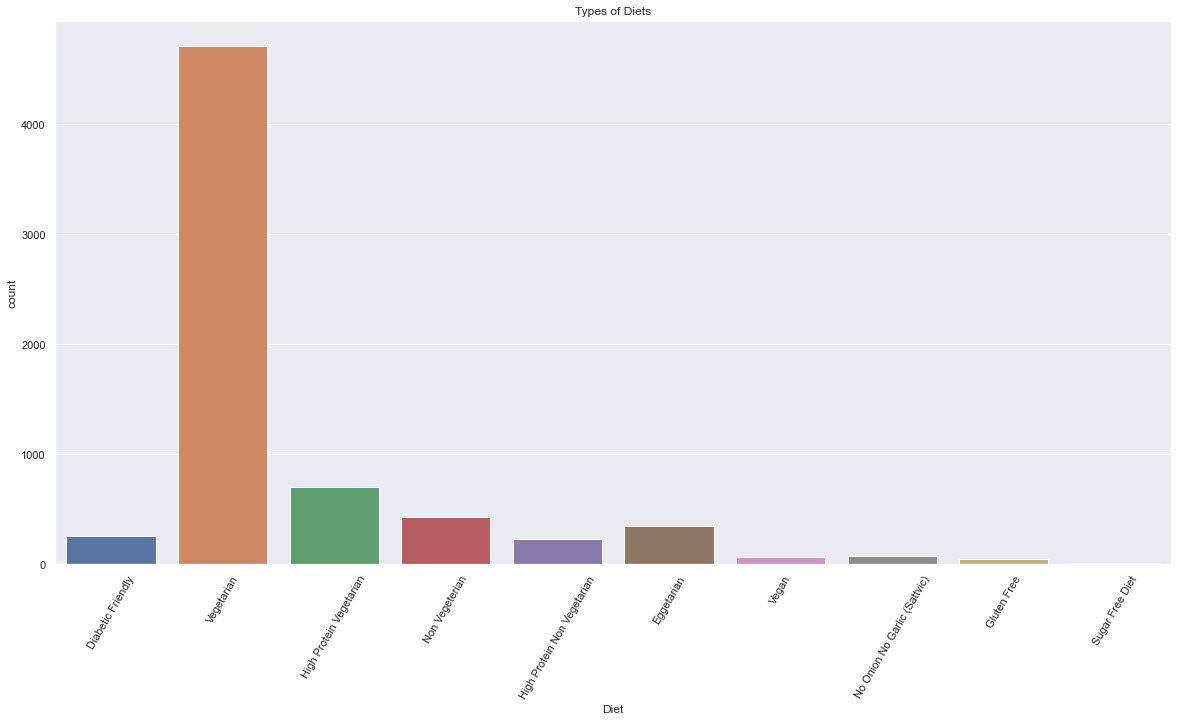

In [50]:
sns.set_theme(style="darkgrid")
sns.countplot(x='Diet',data=data)
plt.xticks(rotation=60)
plt.title("Types of Diets")

#### <font color=red> Vegetarian ,High Proteing Veg, Non Veg ,Eggetarian ....(ranking from high to low) </font>

# <font color=Green>Total Time required to make each type of Diet recipes </font>

* <font color=blue> Does Time affect the course ,diet types? </font>

# CAT PLOT

Text(0.5, 1.0, 'Total time required for each Diet')

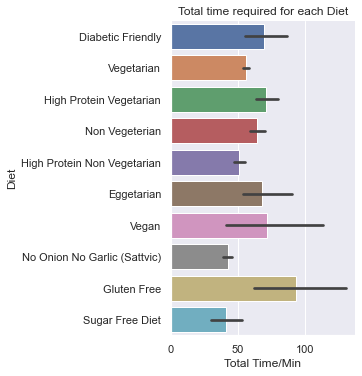

In [128]:
#Total Time
sns.set(rc={'figure.figsize':(50,10)})
sns.catplot(x=data['Total Time/Min'],y='Diet',kind='bar',data=data)
plt.title('Total time required for each Diet')

Text(0.5, 1.0, 'Total time required for each Course')

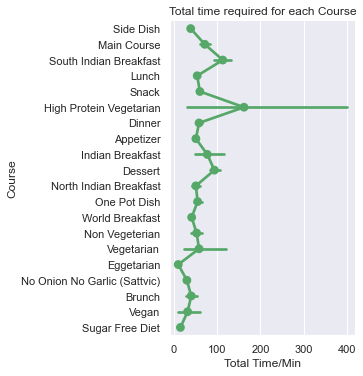

In [127]:
sns.set(rc={'figure.figsize':(50,30)})
sns.catplot(x='Total Time/Min',y='Course',kind='point',data=data,color='g')
plt.title('Total time required for each Course')

# <font color=Green> Let's see the visualised graph in number format </font>

In [115]:
Top_diets = data.Diet.value_counts().head(10)
print("The top_diets are: " )
print(Top_diets)


The top_diets are: 
Vegetarian                      4706
High Protein Vegetarian          705
Non Vegeterian                   427
Eggetarian                       344
Diabetic Friendly                260
High Protein Non Vegetarian      225
No Onion No Garlic (Sattvic)      73
Vegan                             61
Gluten Free                       50
Sugar Free Diet                   14
Name: Diet, dtype: int64


In [123]:
Top_Cuisine = data.Cuisine.value_counts().head(60)
print("The Top Cuisine are: ")
print(Top_Cuisine)


The Top Cuisine are: 
Indian                      1157
Continental                 1020
North Indian Recipes         936
South Indian Recipes         681
Italian Recipes              235
Bengali Recipes              175
Maharashtrian Recipes        173
Kerala Recipes               163
Tamil Nadu                   156
Karnataka                    149
Fusion                       135
Rajasthani                   123
Mexican                      119
Andhra                       118
Gujarati Recipes﻿            115
Goan Recipes                  99
Punjabi                       84
Chettinad                     74
Asian                         72
Thai                          66
Chinese                       59
Kashmiri                      59
French                        54
Middle Eastern                53
Mangalorean                   49
Parsi Recipes                 48
Indo Chinese                  48
Awadhi                        45
Oriya Recipes                 34
Sindhi               

In [124]:
Top_Course = data.Course.value_counts().head(20)
print("The Top Course are: ")
print(Top_Course)


The Top Course are: 
Lunch                           1763
Side Dish                        992
Snack                            876
Dinner                           781
Dessert                          659
Appetizer                        637
Main Course                      315
South Indian Breakfast           260
World Breakfast                  260
North Indian Breakfast           122
Indian Breakfast                 101
Vegetarian                        47
One Pot Dish                      33
High Protein Vegetarian            7
Brunch                             4
Vegan                              3
Non Vegeterian                     2
Eggetarian                         1
Sugar Free Diet                    1
No Onion No Garlic (Sattvic)       1
Name: Course, dtype: int64


# Correlation Matrix : Timings

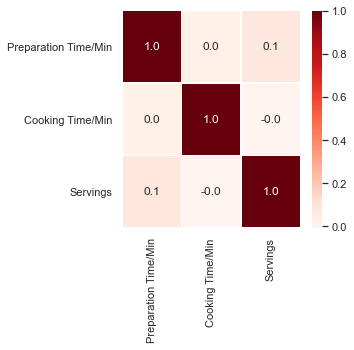

The correlation :                       Preparation Time/Min  Cooking Time/Min  Servings
Preparation Time/Min              1.000000          0.025864  0.071764
Cooking Time/Min                  0.025864          1.000000 -0.007955
Servings                          0.071764         -0.007955  1.000000


In [138]:
#creating a matrix for more than 2 variable ,all the variable here are numeric
plt.subplots(figsize=(4, 4))
corr_numeric=data[['Preparation Time/Min','Cooking Time/Min','Servings']].corr()

#plot the correlation matrix of Preparation Time/Min','Cooking Time/Min','Servings in data dataframe.
sns.heatmap(data[['Preparation Time/Min','Cooking Time/Min','Servings']].corr(), annot=True, cmap = 'Reds',linewidths=.5, fmt= '.1f')
plt.show()
print("The correlation :", corr_numeric)

# <font color=Green> DATA WRANGLING </font>

*Data Wrangling is the process of converting data from the initial format to a format that may be better for analysis.
####  Converting Mins to Hours.
*Can we convert mins to hours ??? Instead of saying 120 mins ?! 

In [142]:
total_Hrs=pd.to_datetime(data['Total Time/Min'], unit='m').dt.strftime('%H:%M')
total_Hrs[100:125]
data['Total Time)']=total_Hrs
data[10:20]
data.columns

Index(['Recipe Name', 'Ingredients', 'Preparation Time/Min',
       'Cooking Time/Min', 'Total Time/Min', 'Servings', 'Cuisine', 'Course',
       'Diet', 'Instructions', 'Link', 'Total Time)'],
      dtype='object')

# <font color=Green> Writing the data to new csv file </font>

In [172]:
data_cleaning = data.to_csv('FoodRecipes.csv')


## <font color=Green> How to remove rows that has non english values </font>

In [6]:
df = pd.read_csv('FoodRecipes.csv')
df.columns

Index(['Recipe No', 'Recipe Name', 'Ingredients', 'Preparation Time/Min',
       'Cooking Time/Min', 'Total Time/Min', 'Servings', 'Cuisine', 'Course',
       'Diet', 'Instructions', 'Link', 'Total Time)'],
      dtype='object')

In [14]:
#dataset contains hindi even after translations in Ingredients columns, dropping these for convenience sake
df = df['Ingredients']

def isEnglish(s):
    try:
        s.encode(encoding='utf-8').decode('ascii')
    except UnicodeDecodeError:
        return False
    else:
        return True

In [15]:
#create boolean mask
mask = df.apply(isEnglish)

####  <font color=red>The above returns a new Dataframe mask which has Ingredients in English

In [38]:
mask[6860:6865]
df = df[mask].dropna()
df.shape
df

0       6 Karela (Bitter Gourd/ Pavakkai) - deseeded,S...
1       2-1 / 2 cups rice - cooked, 3 tomatoes, 3 teas...
2       1-1/2 cups Rice Vermicelli Noodles (Thin),1 On...
3       500 grams Chicken,2 Onion - chopped,1 Tomato -...
4       1 tablespoon chana dal, 1 tablespoon white ura...
                              ...                        
6857    2 cups Paneer (Homemade Cottage Cheese) - crum...
6858    1-1/2 cup Risotto - cooked risotto (recipe bel...
6859    1 cup Quinoa,3/4 cup Sugar,1 teaspoon Cardamom...
6862    150 grams Spring Onion (Bulb & Greens) - chopp...
6863    1 kg Chicken - medium pieces,1/2 cup Mustard o...
Name: Ingredients, Length: 6258, dtype: object

###  <font color=Green>Merging Data frame Mask with old data frame and deleting duplicate rows </font>

In [41]:
data_old = pd.read_csv('FoodRecipes.csv')
print("Food Data Old: ",data_old.shape)
print("New df which has Ingrdients in english :",df.shape)

Food Data Old:  (6865, 13)
New df which has Ingrdients in english : (6258,)


##### <font color=blue>An inner join combines two DataFrames based on a join key and returns a new DataFrame that contains only those rows that have matching values in both of the original DataFrames. </font>

In [58]:
#lets have inner join that matches Ingredients ,Ingredients which has hindi values will be excluded
result = pd.concat([data_old, df], axis=1, join='inner')
result.shape

(6258, 14)

#### <font color=Green>Dropping duplicate column (We have 2 ingredients column) </font>

In [50]:
data_new=result.T.drop_duplicates().T

In [51]:
data_new.shape

(6258, 13)

In [59]:
print(data_new.index)

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            6851, 6852, 6854, 6855, 6856, 6857, 6858, 6859, 6862, 6863],
           dtype='int64', length=6258)


* <font color=blue>  The Recipe no and index values are not in order after merging,let's reset the index number </font>

In [100]:
#data_new.reset_index(inplace = True)
#data_new.set_index(['level_0'], inplace = True)
#data_new.drop(['index', 'Recipe No'], axis=1, inplace= True)
data_new.rename(columns = {'Total Time)': 'Total Time'}, inplace = True)
#data_new.columns
#data_new.insert(0, 'Recipe No', range(1, 1 + len(data_new)))
data_new[1250:1255]


,Recipe No,Recipe Name,Ingredients,Preparation Time/Min,Cooking Time/Min,Total Time/Min,Servings,Cuisine,Course,Diet,Instructions,Link,Total Time,Ingredients_count
level_0,,,,,,,,,,,,,,
1250,1251,Recipe Wheat Phulka Yeast- Diabetic Friendly B...,"1/2 cup Ragi Flour (Finger Millet/ Nagli),1 cu...",10,15,25,4,Indian,Main Course,Diabetic Friendly,"To begin making the Ragi Wheat Phulka Recipe, ...",http://www.archanaskitchen.com/ragi-wheat-phul...,00:25,5
1251,1252,Grapes Muffin Recipe,1 cup Whole Wheat Flour - or brown bread flour...,20,20,40,8,Continental,Dessert,Vegetarian,"To begin making the Grapes Muffin recipe, preh...",http://www.archanaskitchen.com/grapes-muffin-r...,00:40,13
1252,1253,Karnataka Style Bassaru Palya Recipe - Toor Da...,"1 cup Arhar dal (Split Toor Dal),1/2 cup Dill ...",5,20,25,4,Karnataka,Side Dish,Vegetarian,To begin making the Karnataka Style Bassaru Pa...,https://www.archanaskitchen.com/karantaka-styl...,00:25,11
1253,1254,Karwar Style Phodni Phov Recipe- Red Rice Poha...,"2 cups Red Poha (Flattened Red Rice),4 tablesp...",10,10,20,4,Karnataka,South Indian Breakfast,Vegetarian,To begin making Karwar Style Phodni Phov Recip...,http://www.archanaskitchen.com/phodni-phov-rec...,00:20,11
1254,1255,Chinese Bhel Recipe - Crispy Noodle Salad,"150 grams Hakka Noodles,1 tablespoon Sunflower...",15,30,45,2,Fusion,Snack,Vegetarian,"To begin making the Chinese Bhel, get all the ...",https://www.archanaskitchen.com/chinese-bhel-r...,00:45,11


## <font color=Green> Does the number of ingredients have any effect on cooking time? </font>

#### <font color=Green> How many ingredients are there in each recipes? </font>

In [102]:
Ingredients_count= data_new['Ingredients'].apply(lambda n: len(n.split(',')))
data_new['Ingredients_count']= Ingredients_count
data_new[['Ingredients','Ingredients_count']]

#writing to new data
data_cleaning_process= data_new.to_csv('Food_Recipes.csv')



In [2]:
food_df = pd.read_csv('Food_Recipes.csv')
food_df.columns

Index(['level_0', 'Recipe No', 'Recipe Name', 'Ingredients',
       'Preparation Time/Min', 'Cooking Time/Min', 'Total Time/Min',
       'Servings', 'Cuisine', 'Course', 'Diet', 'Instructions', 'Link',
       'Total Time', 'Ingredients_count'],
      dtype='object')

In [4]:
food_df['Ingredients_count'].describe()

count    6258.000000
mean       12.224513
std         5.050386
min         1.000000
25%         9.000000
50%        12.000000
75%        15.000000
max        45.000000
Name: Ingredients_count, dtype: float64

In [31]:
food_df[['Cooking Time/Min','Ingredients_count']].corr()

,Cooking Time/Min,Ingredients_count
Cooking Time/Min,1.000000,0.085873
Ingredients_count,0.085873,1.000000


(0.0, 945.0)

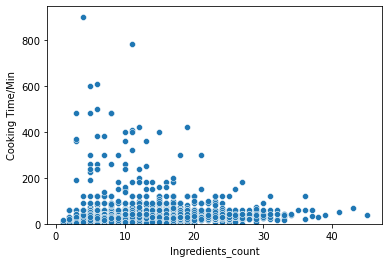

In [6]:
sns.scatterplot(x="Ingredients_count", y = 'Cooking Time/Min', data=food_df)
plt.ylim(0,)

###### <font color=red>The above plot suggests the absence of a linear relationship between the two variables </font>

### <font color=Green> Total Cooking Time (What if user has more time/less cooking time)</font>

In [70]:
recipe=food_df.loc[food_df['Total Time/Min'] >= 200]
print(recipe.shape)
recipe[['Recipe Name','Total Time/Min']].sort_values(by=['Total Time/Min'])

(230, 15)


,Recipe Name,Total Time/Min
484,Mango Kalakand Recipe,200
2921,Murungai Keerai Masala Vadai Recipe,200
1520,Murungai Keera Masala Vada Recipe - Murungai K...,200
5634,Whole Wheat Vegetarian Stromboli Recipe,200
5509,Grilled cheese fenugreek tikki recipe,200
...,...,...
962,Kollu Masala Dosa Recipe - High Protein Horse ...,960
2756,Dairy Free Balsamic Strawberry Ice-cream Recipe,980
5907,Homemade Quick Puff Pastry Sheet Recipe | Perf...,1440
879,Kavati recipe - Nepali Beans Soup (Recipe),1470


#### <font color=red>230 recipes have cooking time more than 200 mins </font>

### <font color=Green>What if the user has less than 30 mins to cook a recipe? </font>

In [76]:
recipe1=food_df.loc[food_df['Total Time/Min'] <= 30]
recipe1.shape
recipe1[['Recipe Name','Total Time/Min']].sort_values(by=['Total Time/Min'])

,Recipe Name,Total Time/Min
5934,Besan vegetable recipe,0
5435,Kakka Orotti Recipe - Steamed Mini Rice Balls ...,0
2230,Homemade Ghee Recipe,0
3059,Coffee Recipe With Instant Coffee Powder,4
4110,Fried Egg Recipe - Sunny Side Up,4
...,...,...
3429,Rajasthani Khoya Matar Sabzi Recipe,30
3430,Black Bean Noodles Recipe,30
3431,Pudina Quinoa Recipe,30
3197,Mullangi Poriyal recipe - South Indian Style R...,30


###### <font color=red>Less than 30 mins we 1868 recipes, available in our dataset </font>

## <font color=Green>Groupby vs Pivot </font>

### The "groupby" method groups data by different categories

In [42]:
df_group_one= food_df[['Course','Diet','Recipe Name','Total Time/Min']]
df_group_one = df_group_one.groupby(['Course'],as_index=True).mean()
df_group_one.sort_values(by=['Total Time/Min'], inplace= False)


,Total Time/Min
Course,
Eggetarian,10.000000
Sugar Free Diet,15.000000
No Onion No Garlic (Sattvic),30.000000
Vegan,31.666667
Side Dish,38.953881
Brunch,40.000000
World Breakfast,41.468504
Appetizer,50.309365
North Indian Breakfast,52.330189


In [40]:
df_grouping = food_df[['Course','Diet','Recipe Name','Total Time/Min']]
grouping_data = df_grouping.groupby(['Course','Diet','Recipe Name'], as_index= False).mean()
grouping_data[:20]
#grouping_data.shape

(6245, 4)

In [44]:
grouping_cuisine= food_df[['Diet','Cuisine','Total Time/Min']]
grouping = grouping_cuisine.groupby(['Cuisine','Diet'], as_index= True).mean()
grouping.shape
grouping[:60]

Total Time/Min
Cuisine         Diet                                        
Afghan          Vegetarian                         25.000000
African         Eggetarian                         47.500000
                High Protein Non Vegetarian        95.000000
                High Protein Vegetarian            51.000000
                Non Vegeterian                     55.000000
                Vegetarian                         45.714286
American        High Protein Non Vegetarian       120.000000
                High Protein Vegetarian            35.000000
                Non Vegeterian                     27.500000
                Vegetarian                         91.666667
Andhra          Diabetic Friendly                  39.285714
                Gluten Free                       100.000000
                High Protein Non Vegetarian        55.000000
                High Protein Vegetarian            61.000000
                Non Vegeterian                     42.000000
                Vegetarian                         48.060241
Appetizer       Eggetarian                         60.000000
                High Protein Vegetarian           245.000000
Arab            Vegetarian                         55.000000
Asian           Diabetic Friendly                  25.000000
                Eggetarian                         33.333333
                Gluten Free                         7.000000
                High Protein Non Vegetarian        25.000000
                High Protein Vegetarian            45.000000
                Non Vegeterian                     40.000000
                Vegan                              25.000000
                Vegetarian                         42.425000
Assamese        Eggetarian                         37.500000
                Gluten Free                       165.000000
                High Protein Non Vegetarian        30.000000
                High Protein Vegetarian            65.000000
                Non Vegeterian                     41.250000
                Vegetarian                         34.615385
Awadhi          Diabetic Friendly                  35.000000
                Eggetarian                         42.500000
                High Protein Non Vegetarian        42.500000
                High Protein Vegetarian            46.000000
                Non Vegeterian                    161.666667
                Vegetarian                         51.956522
Bengali Recipes Eggetarian                         63.000000
                High Protein Non Vegetarian        43.684211
                High Protein Vegetarian            67.500000
                No Onion No Garlic (Sattvic)       68.333333
                Non Vegeterian                     67.181818
                Vegetarian                         57.968750
Bihari          Diabetic Friendly                 151.000000
                High Protein Vegetarian           141.666667
                Vegetarian                         99.600000
British         Eggetarian                         50.000000
                Vegetarian                        113.750000
Brunch          Vegetarian                         20.000000
Burmese         Vegetarian                         50.000000
Cantonese       Non Vegeterian                     45.000000
                Vegetarian                         49.166667
Caribbean       High Protein Non Vegetarian        65.000000
                Vegetarian                         65.000000
Chettinad       Diabetic Friendly                  20.000000
                Eggetarian                         50.000000
                Gluten Free                        20.000000
                High Protein Non Vegetarian        56.250000

### <font color=Green>Pivot Table</font>

In [55]:
pd.pivot_table(food_df, index =['Diet','Course'])

Cooking Time/Min  Ingredients_count  \
Diet              Course                                                        
Diabetic Friendly Appetizer                      15.625000          10.250000   
                  Dinner                         33.421053          10.105263   
                  Indian Breakfast               26.071429          10.857143   
                  Lunch                          25.153846          12.184615   
                  Main Course                    26.500000          12.200000   
...                                                    ...                ...   
Vegetarian        South Indian Breakfast         27.639752          11.130435   
                  Sugar Free Diet                 0.000000           3.000000   
                  Vegan                           5.000000           3.000000   
                  Vegetarian                     18.346154           8.730769   
                  World Breakfast                22.117117           9.414414   

                                          Preparation Time/Min    Recipe No  \
Diet              Course                                                      
Diabetic Friendly Appetizer                          16.250000  3620.375000   
                  Dinner                             24.210526  3514.736842   
                  Indian Breakfast                   70.000000  2926.357143   
                  Lunch                              31.769231  3167.230769   
                  Main Course                        73.000000  3222.300000   
...                                                        ...          ...   
Vegetarian        South Indian Breakfast             73.273292  3416.776398   
                  Sugar Free Diet                    15.000000  5358.000000   
                  Vegan                               5.000000  6010.000000   
                  Vegetarian                         13.692308  3265.807692   
                  World Breakfast                    22.495495  3394.792793   

                                           Servings  Total Time/Min  \
Diet              Course                                              
Diabetic Friendly Appetizer                3.875000       31.875000   
                  Dinner                   3.631579       57.631579   
                  Indian Breakfast         3.571429       96.071429   
                  Lunch                    3.953846       56.923077   
                  Main Course              4.100000       99.500000   
...                                             ...             ...   
Vegetarian        South Indian Breakfast   4.478261      100.913043   
                  Sugar Free Diet          4.000000       15.000000   
                  Vegan                    2.000000       10.000000   
                  Vegetarian              54.346154       32.038462   
                  World Breakfast          3.540541       44.612613   

                                              level_0  
Diet              Course                               
Diabetic Friendly Appetizer               3619.375000  
                  Dinner                  3513.736842  
                  Indian Breakfast        2925.357143  
                  Lunch                   3166.230769  
                  Main Course             3221.300000  
...                                               ...  
Vegetarian        South Indian Breakfast  3415.776398  
                  Sugar Free Diet         5357.000000  
                  Vegan                   6009.000000  
                  Vegetarian              3264.807692  
                  World Breakfast         3393.792793  

[120 rows x 7 columns]

In [56]:
pd.pivot_table(food_df, index =['Cuisine','Course'])

Cooking Time/Min  Ingredients_count  \
Cuisine         Course                                                 
Afghan          Snack                   10.000000           6.000000   
African         Appetizer               37.500000          16.000000   
                Dinner                  52.142857          17.571429   
                Main Course             29.166667          17.166667   
                Vegetarian              20.000000          15.000000   
...                                           ...                ...   
Vietnamese      Main Course             55.000000          29.000000   
                Side Dish               10.000000          14.000000   
                Snack                   35.000000          21.000000   
World Breakfast Sugar Free Diet          0.000000           3.000000   
                Vegetarian              16.000000          10.000000   

                                 Preparation Time/Min  Recipe No    Servings  \
Cuisine         Course                                                         
Afghan          Snack                       15.000000     3902.0    3.000000   
African         Appetizer                   17.500000     3429.5    3.500000   
                Dinner                      12.857143     3976.0    3.714286   
                Main Course                 16.666667     3197.5    3.833333   
                Vegetarian                  15.000000     4429.0  150.000000   
...                                               ...        ...         ...   
Vietnamese      Main Course                 10.000000     1083.0    4.000000   
                Side Dish                   15.000000     1782.0    2.000000   
                Snack                       10.000000     3429.0    4.000000   
World Breakfast Sugar Free Diet             15.000000     5358.0    4.000000   
                Vegetarian                  10.000000     2976.6    2.800000   

                                 Total Time/Min  level_0  
Cuisine         Course                                    
Afghan          Snack                 25.000000   3901.0  
African         Appetizer             55.000000   3428.5  
                Dinner                65.000000   3975.0  
                Main Course           45.833333   3196.5  
                Vegetarian            35.000000   4428.0  
...                                         ...      ...  
Vietnamese      Main Course           65.000000   1082.0  
                Side Dish             25.000000   1781.0  
                Snack                 45.000000   3428.0  
World Breakfast Sugar Free Diet       15.000000   5357.0  
                Vegetarian            26.000000   2975.6  

[482 rows x 7 columns]

In [45]:
grouped_pivot=pd.pivot_table(food_df, index =['Diet'],columns='Course')
grouped_pivot = grouped_pivot.fillna(0) #fill missing Nan values with 0
grouped_pivot

Cooking Time/Min                                \
Course                              Appetizer Brunch     Dessert     Dinner   
Diet                                                                          
Diabetic Friendly                   15.625000    0.0    0.000000  33.421053   
Eggetarian                          24.285714   25.0   63.634146  32.037037   
Gluten Free                         16.666667    0.0   30.000000  30.000000   
High Protein Non Vegetarian         28.750000    0.0   45.000000  29.056604   
High Protein Vegetarian             27.063830   25.0   35.000000  33.263158   
No Onion No Garlic (Sattvic)        26.250000    0.0   30.000000  32.500000   
Non Vegeterian                      33.062500    0.0   59.166667  43.082192   
Sugar Free Diet                      5.000000    0.0   25.000000   0.000000   
Vegan                                9.285714    0.0  161.000000  31.250000   
Vegetarian                          24.702186   22.5   51.905588  33.566038   

                                                                 \
Course                       Eggetarian High Protein Vegetarian   
Diet                                                              
Diabetic Friendly                   0.0                0.000000   
Eggetarian                          0.0                0.000000   
Gluten Free                         0.0                0.000000   
High Protein Non Vegetarian         0.0                0.000000   
High Protein Vegetarian             0.0               28.333333   
No Onion No Garlic (Sattvic)        0.0                0.000000   
Non Vegeterian                      0.0                0.000000   
Sugar Free Diet                     0.0                0.000000   
Vegan                               0.0                0.000000   
Vegetarian                         10.0               25.000000   

                                                                      \
Course                       Indian Breakfast      Lunch Main Course   
Diet                                                                   
Diabetic Friendly                   26.071429  25.153846   26.500000   
Eggetarian                          16.875000  36.000000   30.714286   
Gluten Free                         26.666667  22.857143    0.000000   
High Protein Non Vegetarian         10.000000  35.869565   26.666667   
High Protein Vegetarian             26.250000  30.854922   30.000000   
No Onion No Garlic (Sattvic)         0.000000  23.928571   24.285714   
Non Vegeterian                       0.000000  41.583333   39.978723   
Sugar Free Diet                      0.000000   0.000000    0.000000   
Vegan                                0.000000  27.727273   38.333333   
Vegetarian                          23.280702  30.118726   31.856322   

                                                           ...        level_0  \
Course                       No Onion No Garlic (Sattvic)  ... Non Vegeterian   
Diet                                                       ...                  
Diabetic Friendly                                     0.0  ...            0.0   
Eggetarian                                            0.0  ...            0.0   
Gluten Free                                           0.0  ...            0.0   
High Protein Non Vegetarian                           0.0  ...            0.0   
High Protein Vegetarian                               0.0  ...            0.0   
No Onion No Garlic (Sattvic)                          0.0  ...            0.0   
Non Vegeterian                                        0.0  ...            0.0   
Sugar Free Diet                                       0.0  ...            0.0   
Vegan                                                 0.0  ...            0.0   
Vegetarian                                           20.0  ...         1204.0   

                                                                               \
Course                       North Indian Breakfast One P

##   <font color=blue>Assignment question: Say a vegetarian user wants some breakfast recipes to try, how will you filter this data to give a list</font>

In [51]:
#newdf = food_df[(food_df.Diet == "Vegetarian") & (food_df.Course == "Dinner")]
#newdf[['Recipe Name','Total Time','Course','Diet']]

#The breakfast is subdivided into many categories, say indian breakfast north indian breakfast and world breakfast.
newdf = food_df[(food_df.Diet=="Vegetarian") & (food_df['Course'].str.endswith("Breakfast"))]
newdf[['Recipe Name','Total Time','Course','Diet']].sort_values(by=['Course'])

,Recipe Name,Total Time,Course,Diet
3381,Maharashtrian Vegetable Amboli Recipe (Savory ...,06:20,Indian Breakfast,Vegetarian
2194,Bottle Gourd & Mint Vegetable Juice Recipe - L...,00:15,Indian Breakfast,Vegetarian
2083,Khichdi Roti रेसिपी - खिचड़ी रोटी (Recipe In Hi...,00:15,Indian Breakfast,Vegetarian
2019,Sweet Potato Flatbread Recipe - Sweet Potato C...,00:40,Indian Breakfast,Vegetarian
1886,Aloo Poha Recipe - Potato Poha,00:50,Indian Breakfast,Vegetarian
...,...,...,...,...
4770,Mango Musk Melon Chia Seeds Pudding Recipe,00:25,World Breakfast,Vegetarian
4786,Apple Vanilla Whole Wheat Pancakes Recipe,00:35,World Breakfast,Vegetarian
4787,Ice-Apple And Plum Rose Juice Recipe,00:20,World Breakfast,Vegetarian
1480,Oat Banana Pancakes Recipe,00:35,World Breakfast,Vegetarian


In [66]:
lunch = food_df[(food_df.Diet == "Diabetic Friendly") & (food_df.Course == "Lunch")]
lunch[['Recipe Name','Total Time','Course','Diet']]
print("Diabetic Friendly Lunch Count :", lunch.shape)


Diabetic Friendly Lunch Count : (65, 15)


### Questions:
1. Is it right way of filtering datas using boolean operation and or equals? If not hints pls.
2. when I check for recipes less than 30 min, I see recipes with 0 total time.(It doesnt make sense?!)Say we have coffee recipe with instant powder which takes 4 mins totally .But there are recipes with zero total time, do we have to fill with avg total time? 
* Time is dependant variable , Categorical variables are independent variable.